In [1]:
import copy
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#　小盒子的类

BinLongth = 50
BinWidth = 40
BinHeight = 32.2


class Box:
    def __init__(self, length, width, height, kind):
        self.length = length
        self.width = width
        self.height = height
        self.kind = kind
        self.volume = self.length * self.width * self.height

    avail = [29, 150, 77]
    List = []

#　组合块的类


class Block:
    def __init__(self, length, width, height, limit_lenght=0, limit_width=0):
        self.length = length
        self.width = width
        self.height = height
        self.volume = self.length * self.width * self.height
        self.contain = [0, 0, 0]
        self.level = 0
        self.limit_lenght = limit_lenght
        self.limit_width = limit_width
        self.new_using_volume = 0

    MinAreaRate = 0.7
    MaxLevel = 5
    MaxBlocks = 30000
    MinFillRate = 0.78
    List = []

    def set_contain(self, block1, block2):
        self.contain[0] = block1.contain[0] + block2.contain[0]
        self.contain[1] = block1.contain[1] + block2.contain[1]
        self.contain[2] = block1.contain[2] + block2.contain[2]

    def set_level(self, block1, block2):
        self.level = max(block1.level, block2.level) + 1

    @classmethod
    def delete_repeat(cls):
        cls.List = list(set(cls.List))

# 大箱子的类


class Bin:
    def __init__(self):
        self.plan = []
        self.using_volume = 0
        self.spaceStack = [[[0, 0, 0], [BinLongth, BinWidth, BinHeight]]]

    List = []
    Length = BinLongth
    Width = BinWidth
    Height = BinHeight
    Num = 0
    volume = BinLongth * BinWidth * BinHeight
    used_volume = 0

    @classmethod
    def fill_rate(cls):
        for bin in cls.List:
            cls.used_volume += bin.using_volume
        return cls.used_volume / (cls.Num * cls.volume)

    @classmethod
    def get_contain_program(cls):
        contain_program = []
        for bin in cls.List:
            con = [0, 0, 0]
            for plan_one in bin.plan:
                con[0] += plan_one[1].contain[0]
                con[1] += plan_one[1].contain[1]
                con[2] += plan_one[1].contain[2]
            contain_program.append(con)
        return contain_program

    def get_contain(self):
        con = [0, 0, 0]
        for plan_one in self.plan:
            con[0] += plan_one[1].contain[0]
            con[1] += plan_one[1].contain[1]
            con[2] += plan_one[1].contain[2]
        return con
# 产生小盒子的列表


def produce_box_list():
    box1 = Box(21, 14, 9, 0)
    box2 = Box(14, 21, 9, 0)
    box3 = Box(14, 19, 21, 0)
    box4 = Box(19, 14, 21, 0)
    box5 = Box(25, 15, 9.5, 1)
    box6 = Box(15, 25, 9.5, 1)
    box7 = Box(15, 9.5, 25, 1)
    box8 = Box(9.5, 15, 25, 1)
    box9 = Box(27.5, 17.5, 10.5, 2)
    box10 = Box(17.5, 27.5, 10.5, 2)
    box11 = Box(10.5, 17.5, 27.5, 2)
    box12 = Box(17.5, 10.5, 27.5, 2)
    Box.List = [box1, box2, box3, box4, box5,
                box6, box7, box8, box9, box10, box11, box12]

# 产生简单的块


def produce_simple_blocks(Block_List, Box_List, Box_avail):
    for box in Box_List:
        for nx in range(1, Box_avail[box.kind]):
            if nx*box.length <= Bin.Length:
                for ny in range(1, Box_avail[box.kind] // nx):
                    if ny*box.width <= Bin.Width:
                        for nz in range(1, Box_avail[box.kind] // nx // ny):
                            if nz * box.height <= Bin.Height:
                                temp_block = Block(
                                    nx * box.length, ny * box.width, nz * box.height,
                                    nx * box.length, ny * box.width)
                                temp_block.contain[box.kind] = nx * ny * nz
                                temp_block.new_using_volume = box.volume*nx * ny * nz
                                if temp_block.contain[box.kind] <= 20:
                                    Block.List.append(temp_block)

# 产生复杂的块


def produce_complex_blocks(Block_List):
    for temp_level in range(0, Block.MaxLevel + 1):
        for block1 in Block_List:
            for block2 in Block_List:
                if block1.level == temp_level or block2.level == temp_level:
                    if block1.limit_lenght == block1.length and \
                            block2.limit_lenght == block2.length and \
                            block1.height == block2.height:
                        temp_block = Block(block1.length + block2.length,
                                           max(block2.width, block1.width),
                                           block1.height,
                                           block1.length + block2.length,
                                           min(block2.width, block1.width))
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2] and \
                                temp_block.contain[0]+temp_block.contain[1]+temp_block.contain[2] <= 20:
                            Block_List.append(temp_block)
                    if block1.limit_width == block1.width and \
                            block2.limit_width == block2.width and \
                            block1.height == block2.height:
                        temp_block = Block(max(block1.length, block2.length),
                                           block1.width + block2.width,
                                           block1.height,
                                           min(block1.length, block2.length),
                                           block1.width+block2.width)
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2] and \
                                temp_block.contain[0]+temp_block.contain[1]+temp_block.contain[2] <= 20:
                            Block_List.append(temp_block)
                    if block1.limit_lenght >= block2.length and \
                            block1.limit_width >= block2.width:
                        temp_block = Block(block1.length, block1.width,
                                           block1.height + block2.height,
                                           block2.limit_lenght, block2.limit_width)
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2] and \
                                temp_block.contain[0]+temp_block.contain[1]+temp_block.contain[2] <= 20:
                            Block_List.append(temp_block)
                    if len(Block_List) >= Block.MaxBlocks:
                        return

# 对块列表排序


def merge_sort(lst):
    if len(lst) <= 1:
        return lst
    middle = len(lst) // 2
    left = merge_sort(lst[:middle])
    right = merge_sort(lst[middle:])
    merged = []
    while left and right:
        if left[0].volume >= right[0].volume:
            merged.append(left.pop(0))
        else:
            merged.append(right.pop(0))
    merged.extend(right if right else left)
    return merged

# 返回适合当前剩余空间的可行块列表


def gen_block_list(bin, pos_space, avail):
    available_blocks = []
    bin_contain = bin.get_contain()
    for block in Block.List:
        if block.length <= pos_space[1][0] and \
                block.width <= pos_space[1][1] and \
                block.height <= pos_space[1][2] and \
                block.contain[0] <= avail[0] and \
                block.contain[1] <= avail[1] and \
                block.contain[2] <= avail[2] and \
                (block.contain[0]+block.contain[1]+block.contain[2]+bin_contain[0]+bin_contain[1]+bin_contain[2]) <= 20:
            available_blocks.append(block)
    return available_blocks

# 切割空间，并将空间入栈


def gen_cutted_space(pos_space, block, space_stack):
    z_space = [[pos_space[0][0], pos_space[0][1], pos_space[0][2] + block.height],
               [block.length, block.width, pos_space[1][2] - block.height]]
    space_stack.append(z_space)
    if (pos_space[1][0] - block.length) >= (pos_space[1][1] - block.width):
        x_space = [[pos_space[0][0] + block.length, pos_space[0][1], pos_space[0][2]],
                   [pos_space[1][0] - block.length, pos_space[1][1], block.height]]
        y_space = [[pos_space[0][0], pos_space[0][1] + block.width, pos_space[0][2]],
                   [block.length, pos_space[1][1] - block.width, block.height]]
        space_stack.append(y_space)
        space_stack.append(x_space)
    else:
        y_space = [[pos_space[0][0], pos_space[0][1] + block.width, pos_space[0][2]],
                   [pos_space[1][0], pos_space[1][1] - block.width, block.height]]
        x_space = [[pos_space[0][0] + block.length, pos_space[0][1], pos_space[0][2]],
                   [pos_space[1][0] - block.length, block.width, block.height]]
        space_stack.append(x_space)
        space_stack.append(y_space)

# 转移空间


def transfer_space(pos_space, space_stack):
    if len(space_stack) == 0:
        return
    accept = space_stack.pop()
    if pos_space[0][2] != accept[0][2]:
        space_stack.append(accept)
        return
    if pos_space[0][0] > accept[0][0] and (accept[0][0] + accept[1][0]) == pos_space[0][0]:
        accept[1][0] += pos_space[1][0]
    elif pos_space[0][0] < accept[0][0] and (accept[0][1] + accept[1][1]) == pos_space[0][1]:
        accept[1][1] += pos_space[1][1]
    space_stack.append(accept)


# 启发式放置,返回填充率
def place_block(ps):
    bin = Bin()
    Bin.Num += 1
    index = 0
    while Box.avail[0] != 0 or Box.avail[1] != 0 or Box.avail[2] != 0:
        bin_contain = bin.get_contain()
        if len(bin.spaceStack) == 0 or (bin_contain[0]+bin_contain[1]+bin_contain[2]) > 20:
            Bin.List.append(bin)
            bin = Bin()
            Bin.Num += 1
        cur_pos_space = bin.spaceStack.pop()
        usable_block_list = gen_block_list(bin, cur_pos_space, Box.avail)
        if len(usable_block_list) != 0:
            cur_block = usable_block_list[ps[index %
                                             len(ps)] % len(usable_block_list)]
            index += 1
            Box.avail[0] = Box.avail[0] - cur_block.contain[0]
            Box.avail[1] = Box.avail[1] - cur_block.contain[1]
            Box.avail[2] = Box.avail[2] - cur_block.contain[2]
            bin.plan.append([cur_pos_space, cur_block])
            bin.using_volume += cur_block.new_using_volume
            gen_cutted_space(cur_pos_space, cur_block, bin.spaceStack)
        else:
            transfer_space(cur_pos_space, bin.spaceStack)
    Bin.List.append(bin)
    return Bin.fill_rate()

# 重置类的变量


def reset_date():
    Box.avail = [29, 150, 77]
    Box.List = []
    Bin.List = []
    Bin.Num = 0
    Bin.used_volume = 0


# 模拟退火
def annealing():
    rate_list = []
    produce_box_list()
    produce_simple_blocks(Block.List, Box.List, Box.avail)
    produce_complex_blocks(Block.List)
    Block.delete_repeat()
    Block.List = merge_sort(Block.List)
    ps = [0] * 20
    ps_copy = copy.deepcopy(ps)
    beat_rate = place_block(ps)
    rate_copy = copy.deepcopy(beat_rate)
    temp_us_volume = Bin.volume * Bin.Num
    beat_contain = Bin.get_contain_program()
    max_temperature = 100
    min_temperature = 2
    max_times = 6
    cur_temperature = max_temperature
    reset_date()
    while cur_temperature > min_temperature:
        for i in range(max_times):
            reset_date()
            k = random.randint(0, 19)
            cur_ps = copy.deepcopy(ps_copy)
            cur_ps[k] = random.randint(0, 15)
            cur_rate = place_block(cur_ps)
            rate_list.append(cur_rate)
            if cur_rate > rate_copy:
                ps_copy = cur_ps
                rate_copy = cur_rate
            elif random.random()*1.5 < math.exp(-math.fabs(temp_us_volume - Bin.volume * Bin.Num)*50 / (cur_temperature)):
                ps_copy = cur_ps
                rate_copy = cur_rate
            if cur_rate > beat_rate:
                beat_rate = cur_rate
                beat_contain = Bin.get_contain_program()
        cur_temperature = cur_temperature * 0.9
    print(beat_rate)
    print(beat_contain)

    f.write(str(Bin.Num*BinLongth*BinWidth*BinHeight))
    f.write('\n')
    f.write(str(beat_contain))
    f.write('\n')
    f.write(str(Bin.Num))
    f.write('\n')
    '''
    x_x = [x for x in range(len(rate_list))]
    plt.plot(x_x, rate_list)
    plt.show()
    '''

# annealing()


df1 = pd.read_excel(
    'D:\\Program_file\\Python-File\\20年数模校赛\\工作簿1.xlsx', sheet_name='Sheet1')
x1 = np.array(df1)
filename = 'write_data_1.txt'
with open(filename, 'a') as f:
    xxxx=1
    for lwh in x1:
        f.write(str(xxxx))
        f.write('\n')
        xxxx += 1
        BinLongth = lwh[0]
        BinWidth = lwh[1]
        BinHeight = lwh[2]
        annealing()
        reset_date()
        print("---------------")

0.9821036733307452
[[5, 15, 0], [5, 15, 0], [5, 15, 0], [5, 15, 0], [5, 15, 0], [0, 19, 0], [0, 19, 0], [0, 19, 0], [0, 18, 0], [2, 0, 11], [2, 0, 11], [0, 0, 13], [0, 0, 13], [0, 0, 13], [0, 0, 13], [0, 0, 3]]
---------------
1.0534351950698757
[[6, 11, 0], [6, 11, 0], [6, 11, 0], [6, 11, 0], [2, 11, 4], [2, 11, 4], [0, 20, 0], [0, 20, 0], [0, 20, 0], [0, 20, 0], [0, 4, 11], [0, 0, 13], [0, 0, 13], [0, 0, 13], [0, 0, 13], [1, 0, 6]]
---------------
0.5107564582156973
[[2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [2, 0, 4], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 10, 0], [0, 0, 6], [0, 0, 6], [0, 0, 6], [1, 0, 3]]
---------------
0.8847005761686824
[[6, 10, 0], [6, 10, 0], [6, 10, 0], [6, 10, 0], [2, 10, 4], [2, 10, 4], [0, 20, 0], [0, 20, 0], [0, 20, 0], [0, 

0.6945830729166667
[[0, 66, 0], [0, 66, 0], [0, 12, 32], [29, 6, 24], [0, 0, 21]]


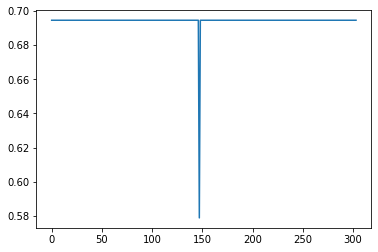

In [3]:
import copy
import random
import math

import pandas as pd

import matplotlib.pyplot as plt

#　小盒子的类


class Box:
    def __init__(self, length, width, height, kind):
        self.length = length
        self.width = width
        self.height = height
        self.kind = kind
        self.volume = self.length * self.width * self.height

    avail = [29, 150, 77]
    List = []

#　组合块的类


class Block:
    def __init__(self, length, width, height, limit_lenght=0, limit_width=0):
        self.length = length
        self.width = width
        self.height = height
        self.volume = self.length * self.width * self.height
        self.contain = [0, 0, 0]
        self.level = 0
        self.limit_lenght = limit_lenght
        self.limit_width = limit_width
        self.new_using_volume = 0
    MinAreaRate = 0.7
    MaxLevel = 6
    MaxBlocks = 90000
    MinFillRate = 0.78
    List = []

    def set_contain(self, block1, block2):
        self.contain[0] = block1.contain[0] + block2.contain[0]
        self.contain[1] = block1.contain[1] + block2.contain[1]
        self.contain[2] = block1.contain[2] + block2.contain[2]

    def set_level(self, block1, block2):
        self.level = max(block1.level, block2.level) + 1

    @classmethod
    def delete_repeat(cls):
        cls.List = list(set(cls.List))

# 大箱子的类


class Bin:
    def __init__(self):
        self.plan = []
        self.using_volume = 0

        self.spaceStack = [[[0, 0, 0], [80, 60, 60]]]

    List = []
    Length = 80
    Width = 60
    Height = 60
    Num = 0
    volume = 80 * 60 * 60
    used_volume = 0

    @classmethod
    def fill_rate(cls):
        for bin in cls.List:
            cls.used_volume += bin.using_volume
        return cls.used_volume / (cls.Num * cls.volume)

    @classmethod
    def get_contain_program(cls):
        contain_program = []
        for bin in cls.List:
            con = [0, 0, 0]
            for plan_one in bin.plan:
                con[0] += plan_one[1].contain[0]
                con[1] += plan_one[1].contain[1]
                con[2] += plan_one[1].contain[2]
            contain_program.append(con)
        return contain_program

# 产生小盒子的列表


def produce_box_list():
    box1 = Box(21, 14, 9, 0)
    box2 = Box(14, 21, 9, 0)
    box3 = Box(25, 15, 9.5, 1)
    box4 = Box(15, 25, 9.5, 1)
    box5 = Box(27.5, 17.5, 10.5, 2)
    box6 = Box(17.5, 27.5, 10.5, 2)
    Box.List = [box1, box2, box3, box4, box5, box6]

# 产生简单的块


def produce_simple_blocks(Block_List, Box_List, Box_avail):
    for box in Box_List:
        for nx in range(1, Box_avail[box.kind]):
            if nx*box.length <= Bin.Length:
                for ny in range(1, Box_avail[box.kind] // nx):
                    if ny*box.width <= Bin.Width:
                        for nz in range(1, Box_avail[box.kind] // nx // ny):
                            if nz * box.height <= Bin.Height:
                                temp_block = Block(
                                    nx * box.length, ny * box.width, nz * box.height,
                                    nx * box.length, ny * box.width)
                                temp_block.new_using_volume = box.volume*nx * ny * nz
                                temp_block.contain[box.kind] = nx * ny * nz
                                Block.List.append(temp_block)

# 产生复杂的块


def produce_complex_blocks(Block_List):
    for temp_level in range(0, Block.MaxLevel + 1):
        for block1 in Block_List:
            for block2 in Block_List:
                if block1.level == temp_level or block2.level == temp_level:
                    if block1.limit_lenght == block1.length and \
                            block2.limit_lenght == block2.length and \
                            block1.height == block2.height:
                        temp_block = Block(block1.length + block2.length,
                                           max(block2.width, block1.width),
                                           block1.height,
                                           block1.length + block2.length,
                                           min(block2.width, block1.width))
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2]:
                            Block_List.append(temp_block)
                    if block1.limit_width == block1.width and \
                            block2.limit_width == block2.width and \
                            block1.height == block2.height:
                        temp_block = Block(max(block1.length, block2.length),
                                           block1.width + block2.width,
                                           block1.height,
                                           min(block1.length, block2.length),
                                           block1.width + block2.width)
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2]:
                            Block_List.append(temp_block)
                    if block1.limit_lenght >= block2.length and \
                            block1.limit_width >= block2.width:
                        temp_block = Block(block1.length, block1.width,
                                           block1.height + block2.height,
                                           block2.limit_lenght, block2.limit_width)
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2]:
                            Block_List.append(temp_block)
                    if len(Block_List) >= Block.MaxBlocks:
                        return

# 对块列表排序


def merge_sort(lst):
    if len(lst) <= 1:
        return lst
    middle = len(lst) // 2
    left = merge_sort(lst[:middle])
    right = merge_sort(lst[middle:])
    merged = []
    while left and right:
        if left[0].volume >= right[0].volume:
            merged.append(left.pop(0))
        else:
            merged.append(right.pop(0))
    merged.extend(right if right else left)
    return merged

# 返回适合当前剩余空间的可行块列表


def gen_block_list(pos_space, avail):
    available_blocks = []
    for block in Block.List:
        if block.length <= pos_space[1][0] and \
                block.width <= pos_space[1][1] and \
                block.height <= pos_space[1][2] and \
                block.contain[0] <= avail[0] and \
                block.contain[1] <= avail[1] and \
                block.contain[2] <= avail[2]:
            available_blocks.append(block)
    return available_blocks

# 切割空间，并将空间入栈


def gen_cutted_space(pos_space, block, space_stack):
    z_space = [[pos_space[0][0], pos_space[0][1], pos_space[0][2] + block.height],
               [block.length, block.width, pos_space[1][2] - block.height]]
    space_stack.append(z_space)
    if (pos_space[1][0] - block.length) >= (pos_space[1][1] - block.width):
        x_space = [[pos_space[0][0] + block.length, pos_space[0][1], pos_space[0][2]],
                   [pos_space[1][0] - block.length, pos_space[1][1], block.height]]
        y_space = [[pos_space[0][0], pos_space[0][1] + block.width, pos_space[0][2]],
                   [block.length, pos_space[1][1] - block.width, block.height]]
        space_stack.append(y_space)
        space_stack.append(x_space)
    else:
        y_space = [[pos_space[0][0], pos_space[0][1] + block.width, pos_space[0][2]],
                   [pos_space[1][0], pos_space[1][1] - block.width, block.height]]
        x_space = [[pos_space[0][0] + block.length, pos_space[0][1], pos_space[0][2]],
                   [pos_space[1][0] - block.length, block.width, block.height]]
        space_stack.append(x_space)
        space_stack.append(y_space)

# 转移空间


def transfer_space(pos_space, space_stack):
    if len(space_stack) == 0:
        return
    accept = space_stack.pop()
    if pos_space[0][2] != accept[0][2]:
        space_stack.append(accept)
        return
    if pos_space[0][0] > accept[0][0] and (accept[0][0] + accept[1][0]) == pos_space[0][0]:
        accept[1][0] += pos_space[1][0]
    elif pos_space[0][0] < accept[0][0] and (accept[0][1] + accept[1][1]) == pos_space[0][1]:
        accept[1][1] += pos_space[1][1]
    space_stack.append(accept)


# 启发式放置,返回填充率
def place_block(ps):
    bin = Bin()
    Bin.Num += 1
    index = 0
    while Box.avail[0] != 0 or Box.avail[1] != 0 or Box.avail[2] != 0:
        if len(bin.spaceStack) == 0:
            Bin.List.append(bin)
            bin = Bin()
            Bin.Num += 1
        cur_pos_space = bin.spaceStack.pop()
        usable_block_list = gen_block_list(cur_pos_space, Box.avail)
        if len(usable_block_list) != 0:
            cur_block = usable_block_list[ps[index %
                                             len(ps)] % len(usable_block_list)]
            index += 1
            Box.avail[0] = Box.avail[0] - cur_block.contain[0]
            Box.avail[1] = Box.avail[1] - cur_block.contain[1]
            Box.avail[2] = Box.avail[2] - cur_block.contain[2]
            bin.plan.append([cur_pos_space, cur_block])
            bin.using_volume += cur_block.new_using_volume
            gen_cutted_space(cur_pos_space, cur_block, bin.spaceStack)
        else:
            transfer_space(cur_pos_space, bin.spaceStack)
    Bin.List.append(bin)
    return Bin.fill_rate()

# 重置类的变量


def reset_date():
    Box.avail = [29, 150, 77]
    Box.List = []
    Bin.List = []
    Bin.Num = 0
    Bin.used_volume = 0


# 模拟退火
def annealing():
    rate_list = []
    produce_box_list()
    produce_simple_blocks(Block.List, Box.List, Box.avail)
    produce_complex_blocks(Block.List)
    Block.delete_repeat()
    Block.List = merge_sort(Block.List)
    ps = [0] * 20
    ps_copy = copy.deepcopy(ps)
    beat_rate = place_block(ps)
    rate_copy = copy.deepcopy(beat_rate)
    temp_us_volume = Bin.used_volume
    beat_contain = Bin.get_contain_program()
    max_temperature = 100
    min_temperature = 2
    max_times = 8
    cur_temperature = max_temperature
    reset_date()
    while cur_temperature > min_temperature:
        for i in range(max_times):
            reset_date()
            k = random.randint(0, 19)
            cur_ps = copy.deepcopy(ps_copy)
            cur_ps[k] = random.randint(0, 10)
            cur_rate = place_block(cur_ps)
            rate_list.append(cur_rate)
            if cur_rate > rate_copy:
                ps_copy = cur_ps
                rate_copy = cur_rate
            elif random.random()*1.5 < math.exp(math.exp(-math.fabs(temp_us_volume - Bin.used_volume)*50) / (cur_temperature)):
                ps_copy = cur_ps
                rate_copy = cur_rate
            if cur_rate > beat_rate:
                beat_rate = cur_rate
                beat_contain = Bin.get_contain_program()
        cur_temperature = cur_temperature * 0.9
    print(beat_rate)
    print(beat_contain)
    x_x = [x for x in range(len(rate_list))]
    plt.plot(x_x, rate_list)
    plt.show()


annealing()

0.6945830729166667
[[0, 66, 0], [0, 66, 0], [0, 12, 32], [29, 6, 24], [0, 0, 21]]


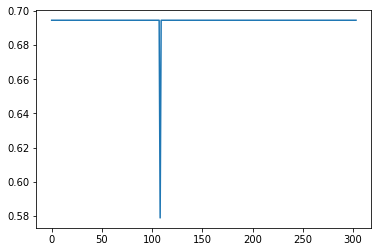

In [4]:
import copy
import random
import math

import pandas as pd

import matplotlib.pyplot as plt

#　小盒子的类


class Box:
    def __init__(self, length, width, height, kind):
        self.length = length
        self.width = width
        self.height = height
        self.kind = kind
        self.volume = self.length * self.width * self.height

    avail = [29, 150, 77]
    List = []

#　组合块的类


class Block:
    def __init__(self, length, width, height, limit_lenght=0, limit_width=0):
        self.length = length
        self.width = width
        self.height = height
        self.volume = self.length * self.width * self.height
        self.contain = [0, 0, 0]
        self.level = 0
        self.limit_lenght = limit_lenght
        self.limit_width = limit_width
        self.new_using_volume = 0
    MinAreaRate = 0.7
    MaxLevel = 6
    MaxBlocks = 90000
    MinFillRate = 0.78
    List = []

    def set_contain(self, block1, block2):
        self.contain[0] = block1.contain[0] + block2.contain[0]
        self.contain[1] = block1.contain[1] + block2.contain[1]
        self.contain[2] = block1.contain[2] + block2.contain[2]

    def set_level(self, block1, block2):
        self.level = max(block1.level, block2.level) + 1

    @classmethod
    def delete_repeat(cls):
        cls.List = list(set(cls.List))

# 大箱子的类


class Bin:
    def __init__(self):
        self.plan = []
        self.using_volume = 0

        self.spaceStack = [[[0, 0, 0], [80, 60, 60]]]

    List = []
    Length = 80
    Width = 60
    Height = 60
    Num = 0
    volume = 80 * 60 * 60
    used_volume = 0

    @classmethod
    def fill_rate(cls):
        for bin in cls.List:
            cls.used_volume += bin.using_volume
        return cls.used_volume / (cls.Num * cls.volume)

    @classmethod
    def get_contain_program(cls):
        contain_program = []
        for bin in cls.List:
            con = [0, 0, 0]
            for plan_one in bin.plan:
                con[0] += plan_one[1].contain[0]
                con[1] += plan_one[1].contain[1]
                con[2] += plan_one[1].contain[2]
            contain_program.append(con)
        return contain_program

# 产生小盒子的列表


def produce_box_list():
    box1 = Box(21, 14, 9, 0)
    box2 = Box(14, 21, 9, 0)
    box3 = Box(25, 15, 9.5, 1)
    box4 = Box(15, 25, 9.5, 1)
    box5 = Box(27.5, 17.5, 10.5, 2)
    box6 = Box(17.5, 27.5, 10.5, 2)
    Box.List = [box1, box2, box3, box4, box5, box6]

# 产生简单的块


def produce_simple_blocks(Block_List, Box_List, Box_avail):
    for box in Box_List:
        for nx in range(1, Box_avail[box.kind]):
            if nx*box.length <= Bin.Length:
                for ny in range(1, Box_avail[box.kind] // nx):
                    if ny*box.width <= Bin.Width:
                        for nz in range(1, Box_avail[box.kind] // nx // ny):
                            if nz * box.height <= Bin.Height:
                                temp_block = Block(
                                    nx * box.length, ny * box.width, nz * box.height,
                                    nx * box.length, ny * box.width)
                                temp_block.new_using_volume = box.volume*nx * ny * nz
                                temp_block.contain[box.kind] = nx * ny * nz
                                Block.List.append(temp_block)

# 产生复杂的块


def produce_complex_blocks(Block_List):
    for temp_level in range(0, Block.MaxLevel + 1):
        for block1 in Block_List:
            for block2 in Block_List:
                if block1.level == temp_level or block2.level == temp_level:
                    if block1.limit_lenght == block1.length and \
                            block2.limit_lenght == block2.length and \
                            block1.height == block2.height:
                        temp_block = Block(block1.length + block2.length,
                                           max(block2.width, block1.width),
                                           block1.height,
                                           block1.length + block2.length,
                                           min(block2.width, block1.width))
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2]:
                            Block_List.append(temp_block)
                    if block1.limit_width == block1.width and \
                            block2.limit_width == block2.width and \
                            block1.height == block2.height:
                        temp_block = Block(max(block1.length, block2.length),
                                           block1.width + block2.width,
                                           block1.height,
                                           min(block1.length, block2.length),
                                           block1.width + block2.width)
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2]:
                            Block_List.append(temp_block)
                    if block1.limit_lenght >= block2.length and \
                            block1.limit_width >= block2.width:
                        temp_block = Block(block1.length, block1.width,
                                           block1.height + block2.height,
                                           block2.limit_lenght, block2.limit_width)
                        temp_block.new_using_volume = block1.new_using_volume+block2.new_using_volume
                        temp_block.set_level(block1, block2)
                        temp_block.set_contain(block1, block2)
                        if (temp_block.limit_lenght * temp_block.limit_width) / (temp_block.length * temp_block.width) >= Block.MinAreaRate and \
                                (block1.volume + block2.volume) / temp_block.volume >= Block.MinFillRate and \
                                temp_block.length <= Bin.Length and \
                                temp_block.width <= Bin.Width and \
                                temp_block.height <= Bin.Height and \
                                temp_block.contain[0] <= Box.avail[0] and \
                                temp_block.contain[1] <= Box.avail[1] and \
                                temp_block.contain[2] <= Box.avail[2]:
                            Block_List.append(temp_block)
                    if len(Block_List) >= Block.MaxBlocks:
                        return

# 对块列表排序


def merge_sort(lst):
    if len(lst) <= 1:
        return lst
    middle = len(lst) // 2
    left = merge_sort(lst[:middle])
    right = merge_sort(lst[middle:])
    merged = []
    while left and right:
        if left[0].volume >= right[0].volume:
            merged.append(left.pop(0))
        else:
            merged.append(right.pop(0))
    merged.extend(right if right else left)
    return merged

# 返回适合当前剩余空间的可行块列表


def gen_block_list(pos_space, avail):
    available_blocks = []
    for block in Block.List:
        if block.length <= pos_space[1][0] and \
                block.width <= pos_space[1][1] and \
                block.height <= pos_space[1][2] and \
                block.contain[0] <= avail[0] and \
                block.contain[1] <= avail[1] and \
                block.contain[2] <= avail[2]:
            available_blocks.append(block)
    return available_blocks

# 切割空间，并将空间入栈


def gen_cutted_space(pos_space, block, space_stack):
    z_space = [[pos_space[0][0], pos_space[0][1], pos_space[0][2] + block.height],
               [block.length, block.width, pos_space[1][2] - block.height]]
    space_stack.append(z_space)
    if (pos_space[1][0] - block.length) >= (pos_space[1][1] - block.width):
        x_space = [[pos_space[0][0] + block.length, pos_space[0][1], pos_space[0][2]],
                   [pos_space[1][0] - block.length, pos_space[1][1], block.height]]
        y_space = [[pos_space[0][0], pos_space[0][1] + block.width, pos_space[0][2]],
                   [block.length, pos_space[1][1] - block.width, block.height]]
        space_stack.append(y_space)
        space_stack.append(x_space)
    else:
        y_space = [[pos_space[0][0], pos_space[0][1] + block.width, pos_space[0][2]],
                   [pos_space[1][0], pos_space[1][1] - block.width, block.height]]
        x_space = [[pos_space[0][0] + block.length, pos_space[0][1], pos_space[0][2]],
                   [pos_space[1][0] - block.length, block.width, block.height]]
        space_stack.append(x_space)
        space_stack.append(y_space)

# 转移空间


def transfer_space(pos_space, space_stack):
    if len(space_stack) == 0:
        return
    accept = space_stack.pop()
    if pos_space[0][2] != accept[0][2]:
        space_stack.append(accept)
        return
    if pos_space[0][0] > accept[0][0] and (accept[0][0] + accept[1][0]) == pos_space[0][0]:
        accept[1][0] += pos_space[1][0]
    elif pos_space[0][0] < accept[0][0] and (accept[0][1] + accept[1][1]) == pos_space[0][1]:
        accept[1][1] += pos_space[1][1]
    space_stack.append(accept)


# 启发式放置,返回填充率
def place_block(ps):
    bin = Bin()
    Bin.Num += 1
    index = 0
    while Box.avail[0] != 0 or Box.avail[1] != 0 or Box.avail[2] != 0:
        if len(bin.spaceStack) == 0:
            Bin.List.append(bin)
            bin = Bin()
            Bin.Num += 1
        cur_pos_space = bin.spaceStack.pop()
        usable_block_list = gen_block_list(cur_pos_space, Box.avail)
        if len(usable_block_list) != 0:
            cur_block = usable_block_list[ps[index %
                                             len(ps)] % len(usable_block_list)]
            index += 1
            Box.avail[0] = Box.avail[0] - cur_block.contain[0]
            Box.avail[1] = Box.avail[1] - cur_block.contain[1]
            Box.avail[2] = Box.avail[2] - cur_block.contain[2]
            bin.plan.append([cur_pos_space, cur_block])
            bin.using_volume += cur_block.new_using_volume
            gen_cutted_space(cur_pos_space, cur_block, bin.spaceStack)
        else:
            transfer_space(cur_pos_space, bin.spaceStack)
    Bin.List.append(bin)
    return Bin.fill_rate()

# 重置类的变量


def reset_date():
    Box.avail = [29, 150, 77]
    Box.List = []
    Bin.List = []
    Bin.Num = 0
    Bin.used_volume = 0


# 模拟退火
def annealing():
    rate_list = []
    produce_box_list()
    produce_simple_blocks(Block.List, Box.List, Box.avail)
    produce_complex_blocks(Block.List)
    Block.delete_repeat()
    Block.List = merge_sort(Block.List)
    ps = [0] * 20
    ps_copy = copy.deepcopy(ps)
    beat_rate = place_block(ps)
    rate_copy = copy.deepcopy(beat_rate)
    temp_us_volume = Bin.used_volume
    beat_contain = Bin.get_contain_program()
    max_temperature = 100
    min_temperature = 2
    max_times = 8
    cur_temperature = max_temperature
    reset_date()
    while cur_temperature > min_temperature:
        for i in range(max_times):
            reset_date()
            k = random.randint(0, 19)
            cur_ps = copy.deepcopy(ps_copy)
            cur_ps[k] = random.randint(0, 10)
            cur_rate = place_block(cur_ps)
            rate_list.append(cur_rate)
            if cur_rate > rate_copy:
                ps_copy = cur_ps
                rate_copy = cur_rate
            elif random.random()*1.5 < math.exp(math.exp(-math.fabs(temp_us_volume - Bin.used_volume)*70) / (cur_temperature)):
                ps_copy = cur_ps
                rate_copy = cur_rate
            if cur_rate > beat_rate:
                beat_rate = cur_rate
                beat_contain = Bin.get_contain_program()
        cur_temperature = cur_temperature * 0.9
    print(beat_rate)
    print(beat_contain)
    x_x = [x for x in range(len(rate_list))]
    plt.plot(x_x, rate_list)
    plt.show()


annealing()

# 0.8281861979166667
#[[0, 55, 0], [0, 55, 0], [0, 12, 32], [29, 4, 24], [0, 24, 21]]
